# Text Clustering and Classification

In [1]:
from datasets import load_dataset

ds = load_dataset('billingsmoore/Tatoeba-bo-en', split='train')['target']

ds[0]

README.md:   0%|          | 0.00/300 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/39 [00:00<?, ? examples/s]

'Everyone always asks me that.'

## Clustering

In [2]:
from easy_text_clustering.clusterer import ClusterClassifier
import pandas as pd

cc = ClusterClassifier(embed_device='cuda')
cc.fit(ds)


INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
/home/j/Documents/MLotsawa/.venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
INFO:root:Embedding texts...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:root:Building FAISS index...
INFO:root:Projecting with umap...
INFO:root:Clustering...
INFO:root:Summarizing cluster centers...


Using HDBSCAN params={}
Request:
<s>[INST]Example 1:
Come on up here.

Example 2:
Good morning!

Example 3:
Good afternoon.

Example 4:
Hello!

Example 5:
Good afternoon.

Example 6:
Happy birthday to you!

Example 7:
It's dark in here.

Example 8:
Come on up here.

Example 9:
Try on this sweater.

Example 10:
Good afternoon.

Use three words total (comma separated)to describe general topics in above texts. Under no circumstances use enumeration. Example format: Tree, Cat, Fireman[/INST]
Number of clusters is 3


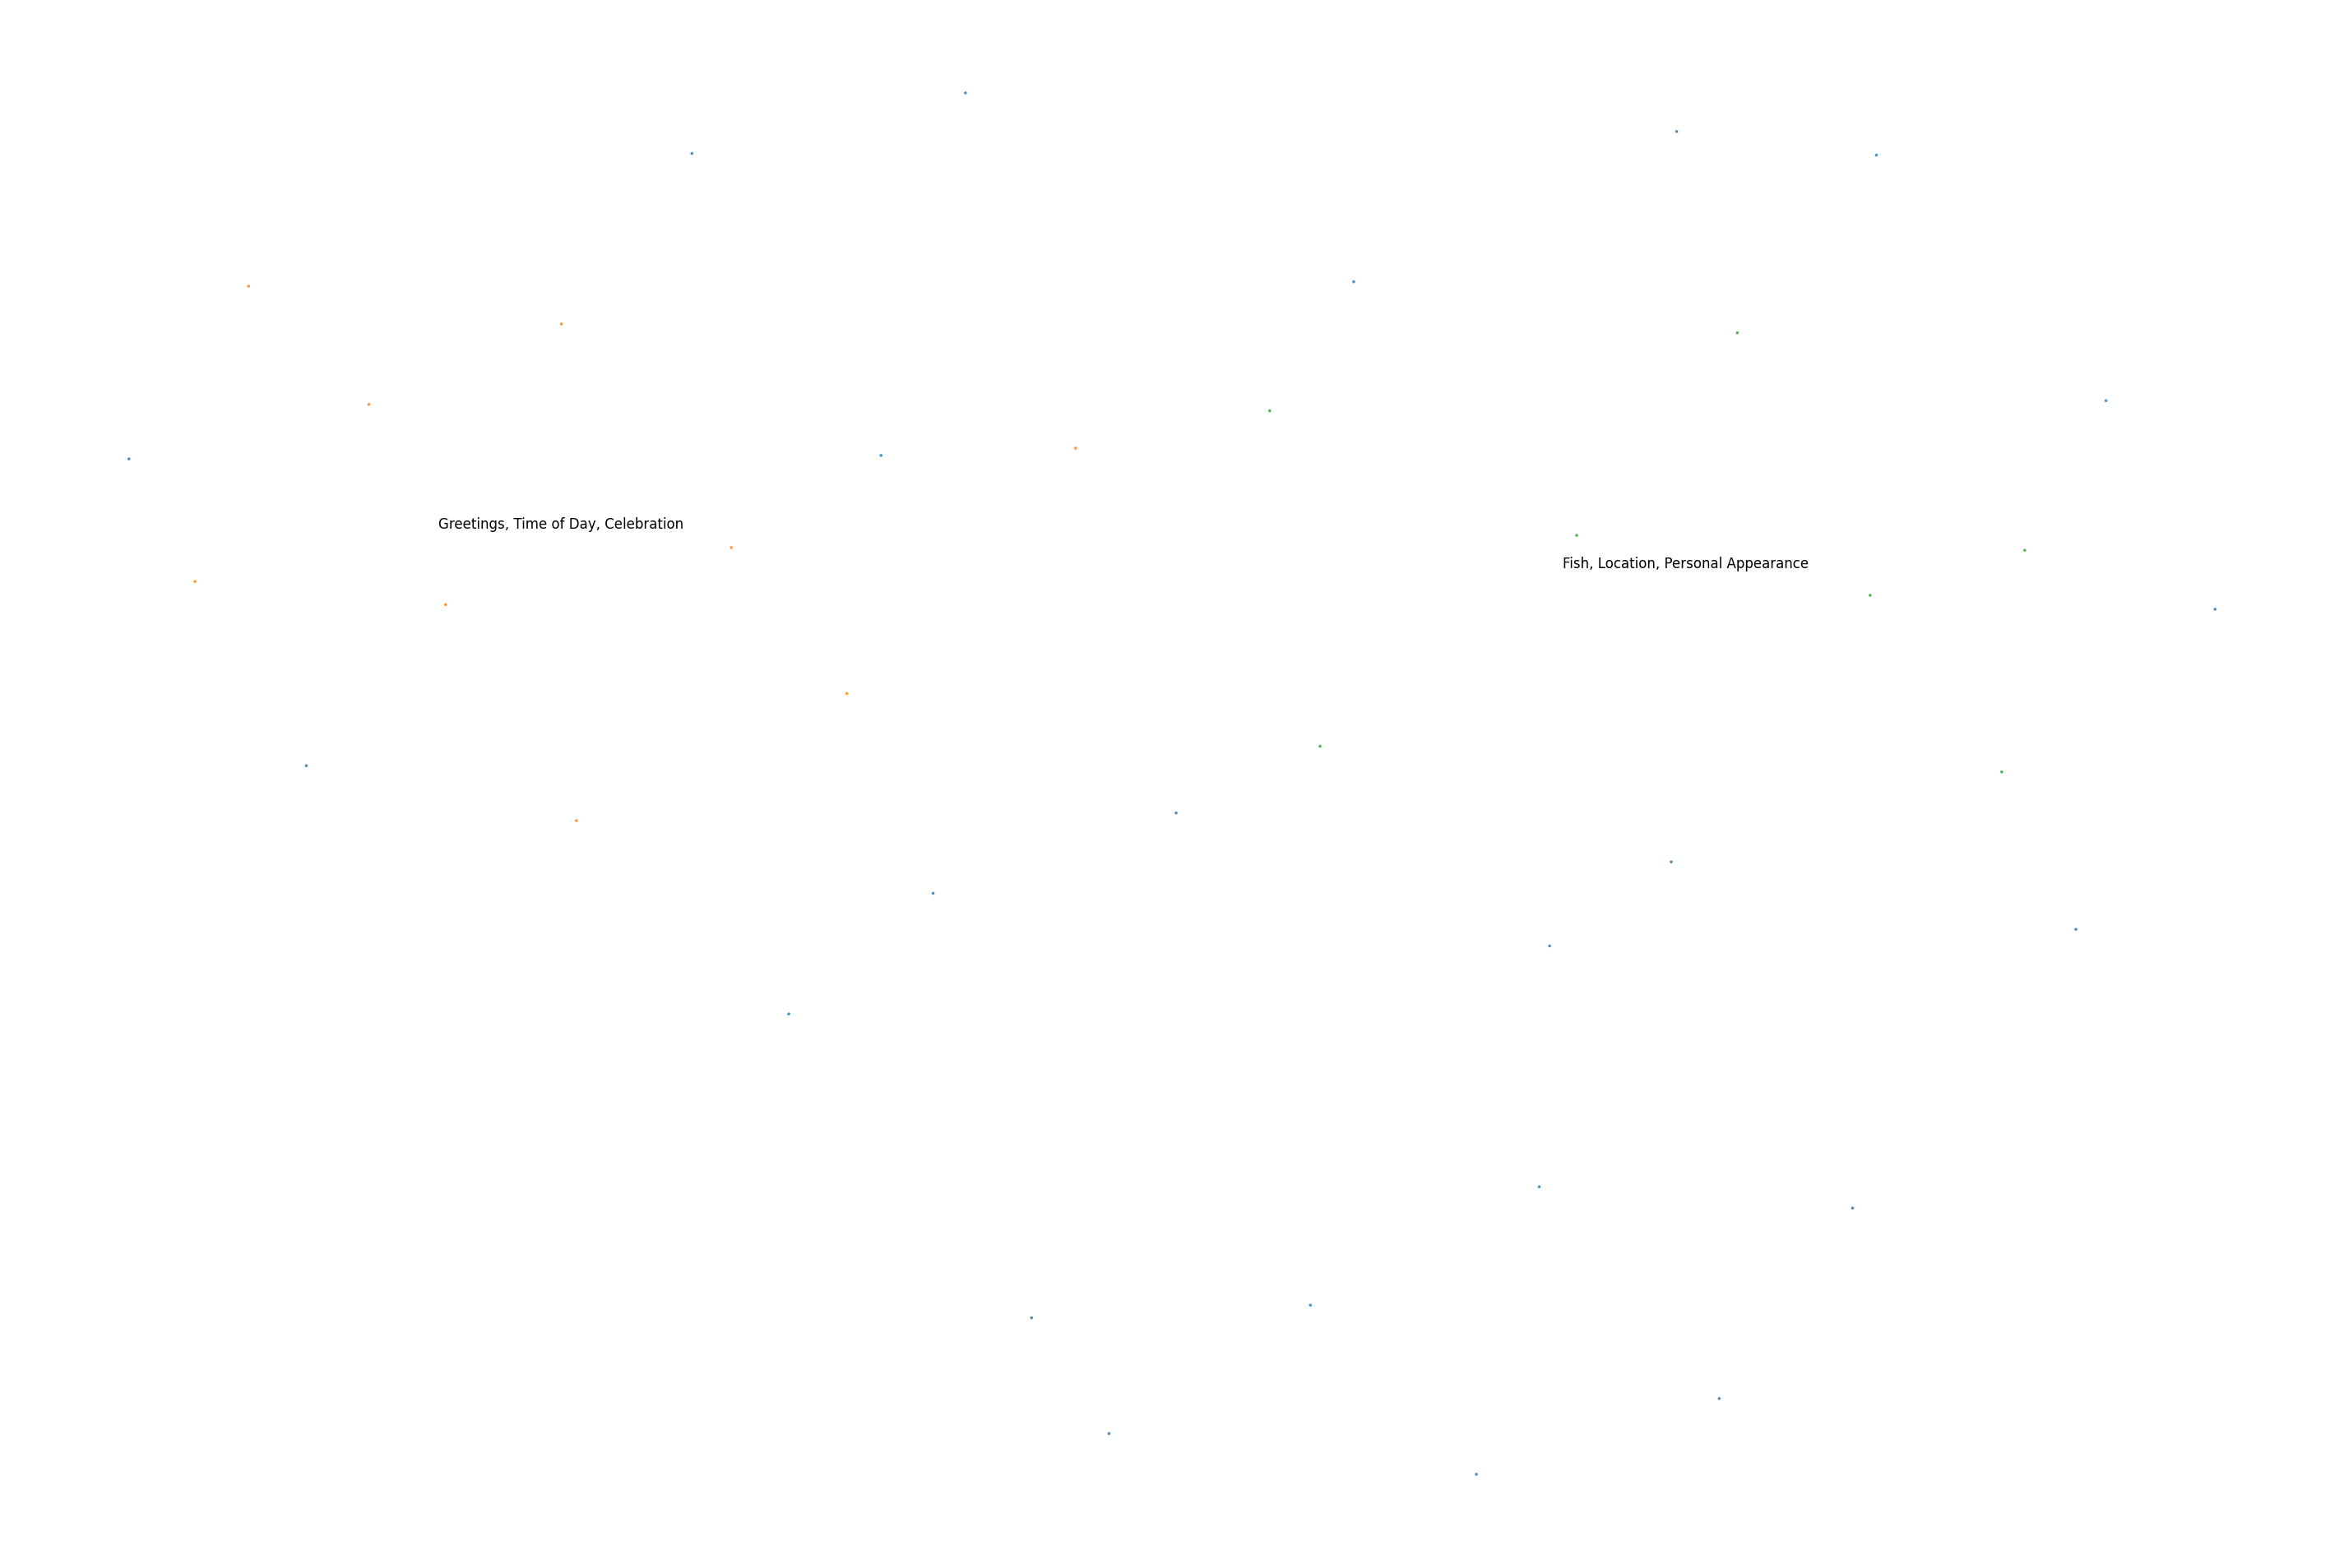

In [3]:
cc.show()

In [4]:
cc.cluster_summaries

{-1: 'None',
 0: 'Greetings, Time of Day, Celebration',
 1: 'Fish, Location, Personal Appearance'}

In [5]:
cc.cluster_labels

array([-1, -1, -1,  0, -1,  0,  1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,
       -1, -1,  0,  1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1,  1,  0, -1,
       -1,  0, -1, -1,  0])

In [6]:
summaries = [cc.cluster_summaries[label] for label in cc.cluster_labels]

In [11]:
full_ds = load_dataset('billingsmoore/Tatoeba-bo-en', split='train')

In [12]:
full_ds[0]

{'source': 'མི་ཚང་མས་འདིའི་སྐོར་ལ་ང་ལ་རྟག་པར་སྐད་ཆ་འདྲི་ཀྱི་འདུག།',
 'target': 'Everyone always asks me that.'}

In [13]:
df = full_ds.to_pandas()
df.head()

,source,target
0,མི་ཚང་མས་འདིའི་སྐོར་ལ་ང་ལ་རྟག་པར་སྐད་ཆ་འདྲི་ཀྱ...,Everyone always asks me that.
1,བྱི་ལ་དོམ་ཆེན་རྒྱ་ནག་ལ་འབའ་ཞིག་ཡོད་རེད།,Giant pandas live only in China.
2,འདི་མོ་རང་གི་རེད། མ་རེད་པས།,"It is hers, is it not?"
3,ཁྱེད་རང་ཨུ་སུའི་སྟོད་ཐུང་འདི་གྱོན་ཆས་རན་མིན་ལྟ...,Try on this sweater.
4,འདི་ནས་ཕ་གིར་སྣུམ་འཁོར་ལ་འགྲོ་ན་ཆུ་ཚོད་གཅིག་སྒ...,It is an hour's drive from here to there.


In [14]:
df['topic'] = summaries

In [15]:
df.head()

,source,target,topic
0,མི་ཚང་མས་འདིའི་སྐོར་ལ་ང་ལ་རྟག་པར་སྐད་ཆ་འདྲི་ཀྱ...,Everyone always asks me that.,None
1,བྱི་ལ་དོམ་ཆེན་རྒྱ་ནག་ལ་འབའ་ཞིག་ཡོད་རེད།,Giant pandas live only in China.,None
2,འདི་མོ་རང་གི་རེད། མ་རེད་པས།,"It is hers, is it not?",None
3,ཁྱེད་རང་ཨུ་སུའི་སྟོད་ཐུང་འདི་གྱོན་ཆས་རན་མིན་ལྟ...,Try on this sweater.,"Greetings, Time of Day, Celebration"
4,འདི་ནས་ཕ་གིར་སྣུམ་འཁོར་ལ་འགྲོ་ན་ཆུ་ཚོད་གཅིག་སྒ...,It is an hour's drive from here to there.,None


In [16]:
from datasets import Dataset

labeled_ds = Dataset.from_pandas(df)

In [17]:
labeled_ds[0]

{'source': 'མི་ཚང་མས་འདིའི་སྐོར་ལ་ང་ལ་རྟག་པར་སྐད་ཆ་འདྲི་ཀྱི་འདུག།',
 'target': 'Everyone always asks me that.',
 'topic': 'None'}

In [18]:
labeled_ds.push_to_hub('billingsmoore/Tatoeba-bo-en')

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/billingsmoore/Tatoeba-bo-en/commit/2269a0619bfb8aeb5e9bfa526024b5bcbc7d08f5', commit_message='Upload dataset', commit_description='', oid='2269a0619bfb8aeb5e9bfa526024b5bcbc7d08f5', pr_url=None, pr_revision=None, pr_num=None)